In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve, learning_curve
RANDOM_STATE = 17

In [2]:
def make_submission(predictions, fname):
    out = pd.DataFrame(data=predictions, columns=['Probability'])
    out.index += 1
    out.to_csv(fname, index_label='id')

In [3]:
df = pd.read_csv(r'D:\TeachMeSkills\DZ\dz18\cs-training.csv', index_col=0)

In [4]:
feature_names = df.columns[1:]
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
print(df.shape)
df.describe(include = "all").T

(150000, 11)


,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [7]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

array([[<AxesSubplot:title={'center':'SeriousDlqin2yrs'}>,
        <AxesSubplot:title={'center':'RevolvingUtilizationOfUnsecuredLines'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'NumberOfTime30-59DaysPastDueNotWorse'}>,
        <AxesSubplot:title={'center':'DebtRatio'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'NumberOfOpenCreditLinesAndLoans'}>,
        <AxesSubplot:title={'center':'NumberOfTimes90DaysLate'}>,
        <AxesSubplot:title={'center':'NumberRealEstateLoansOrLines'}>],
       [<AxesSubplot:title={'center':'NumberOfTime60-89DaysPastDueNotWorse'}>,
        <AxesSubplot:title={'center':'NumberOfDependents'}>,
        <AxesSubplot:>]], dtype=object)

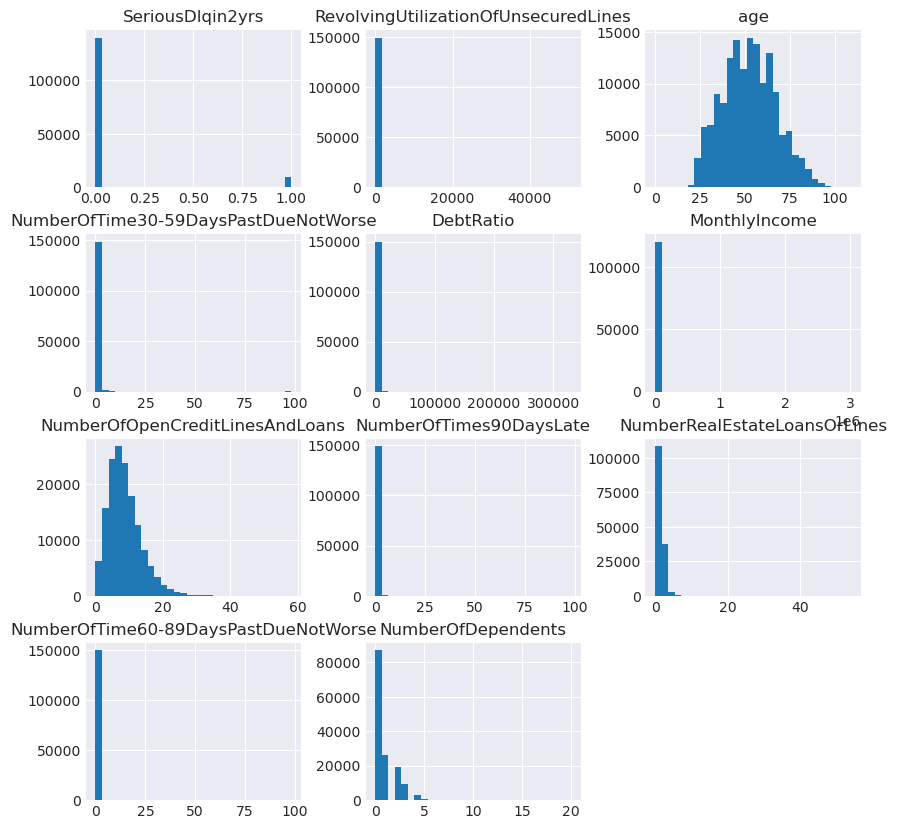

In [8]:
df.hist(bins = 30, figsize = (10, 10))

Удалим записи, где возраст равен 0. Такая запись одна)

In [9]:
df=df[(df['age']!=0)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149999 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149999 non-null  float64
 2   age                                   149999 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149999 non-null  int64  
 4   DebtRatio                             149999 non-null  float64
 5   MonthlyIncome                         120268 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149999 non-null  int64  
 7   NumberOfTimes90DaysLate               149999 non-null  int64  
 8   NumberRealEstateLoansOrLines          149999 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149999 non-null  int64  
 10  NumberOfDependents                    146075 non-null  float64
dtype

Пропуски в столбце MonthlyIncome заменим медианными значениями

In [11]:
df['MonthlyIncome']=df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149999 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149999 non-null  float64
 2   age                                   149999 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149999 non-null  int64  
 4   DebtRatio                             149999 non-null  float64
 5   MonthlyIncome                         149999 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149999 non-null  int64  
 7   NumberOfTimes90DaysLate               149999 non-null  int64  
 8   NumberRealEstateLoansOrLines          149999 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149999 non-null  int64  
 10  NumberOfDependents                    146075 non-null  float64
dtype

Пропуски в столбце NumberOfDependents заменим на 0, как самый распростаненный

In [13]:
df['NumberOfDependents']=df['NumberOfDependents'].fillna(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149999 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149999 non-null  float64
 2   age                                   149999 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149999 non-null  int64  
 4   DebtRatio                             149999 non-null  float64
 5   MonthlyIncome                         149999 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149999 non-null  int64  
 7   NumberOfTimes90DaysLate               149999 non-null  int64  
 8   NumberRealEstateLoansOrLines          149999 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149999 non-null  int64  
 10  NumberOfDependents                    149999 non-null  float64
dtype

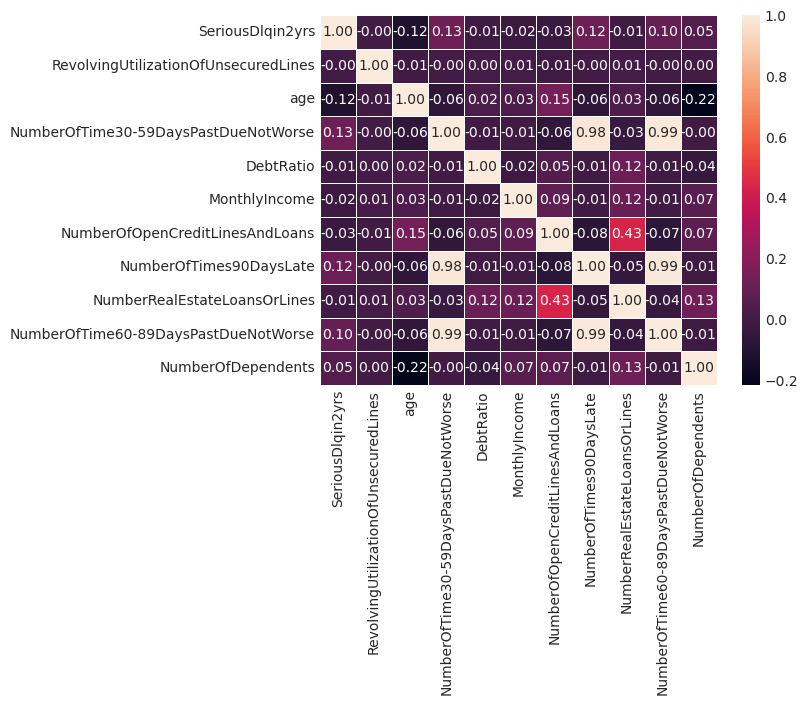

In [15]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f");

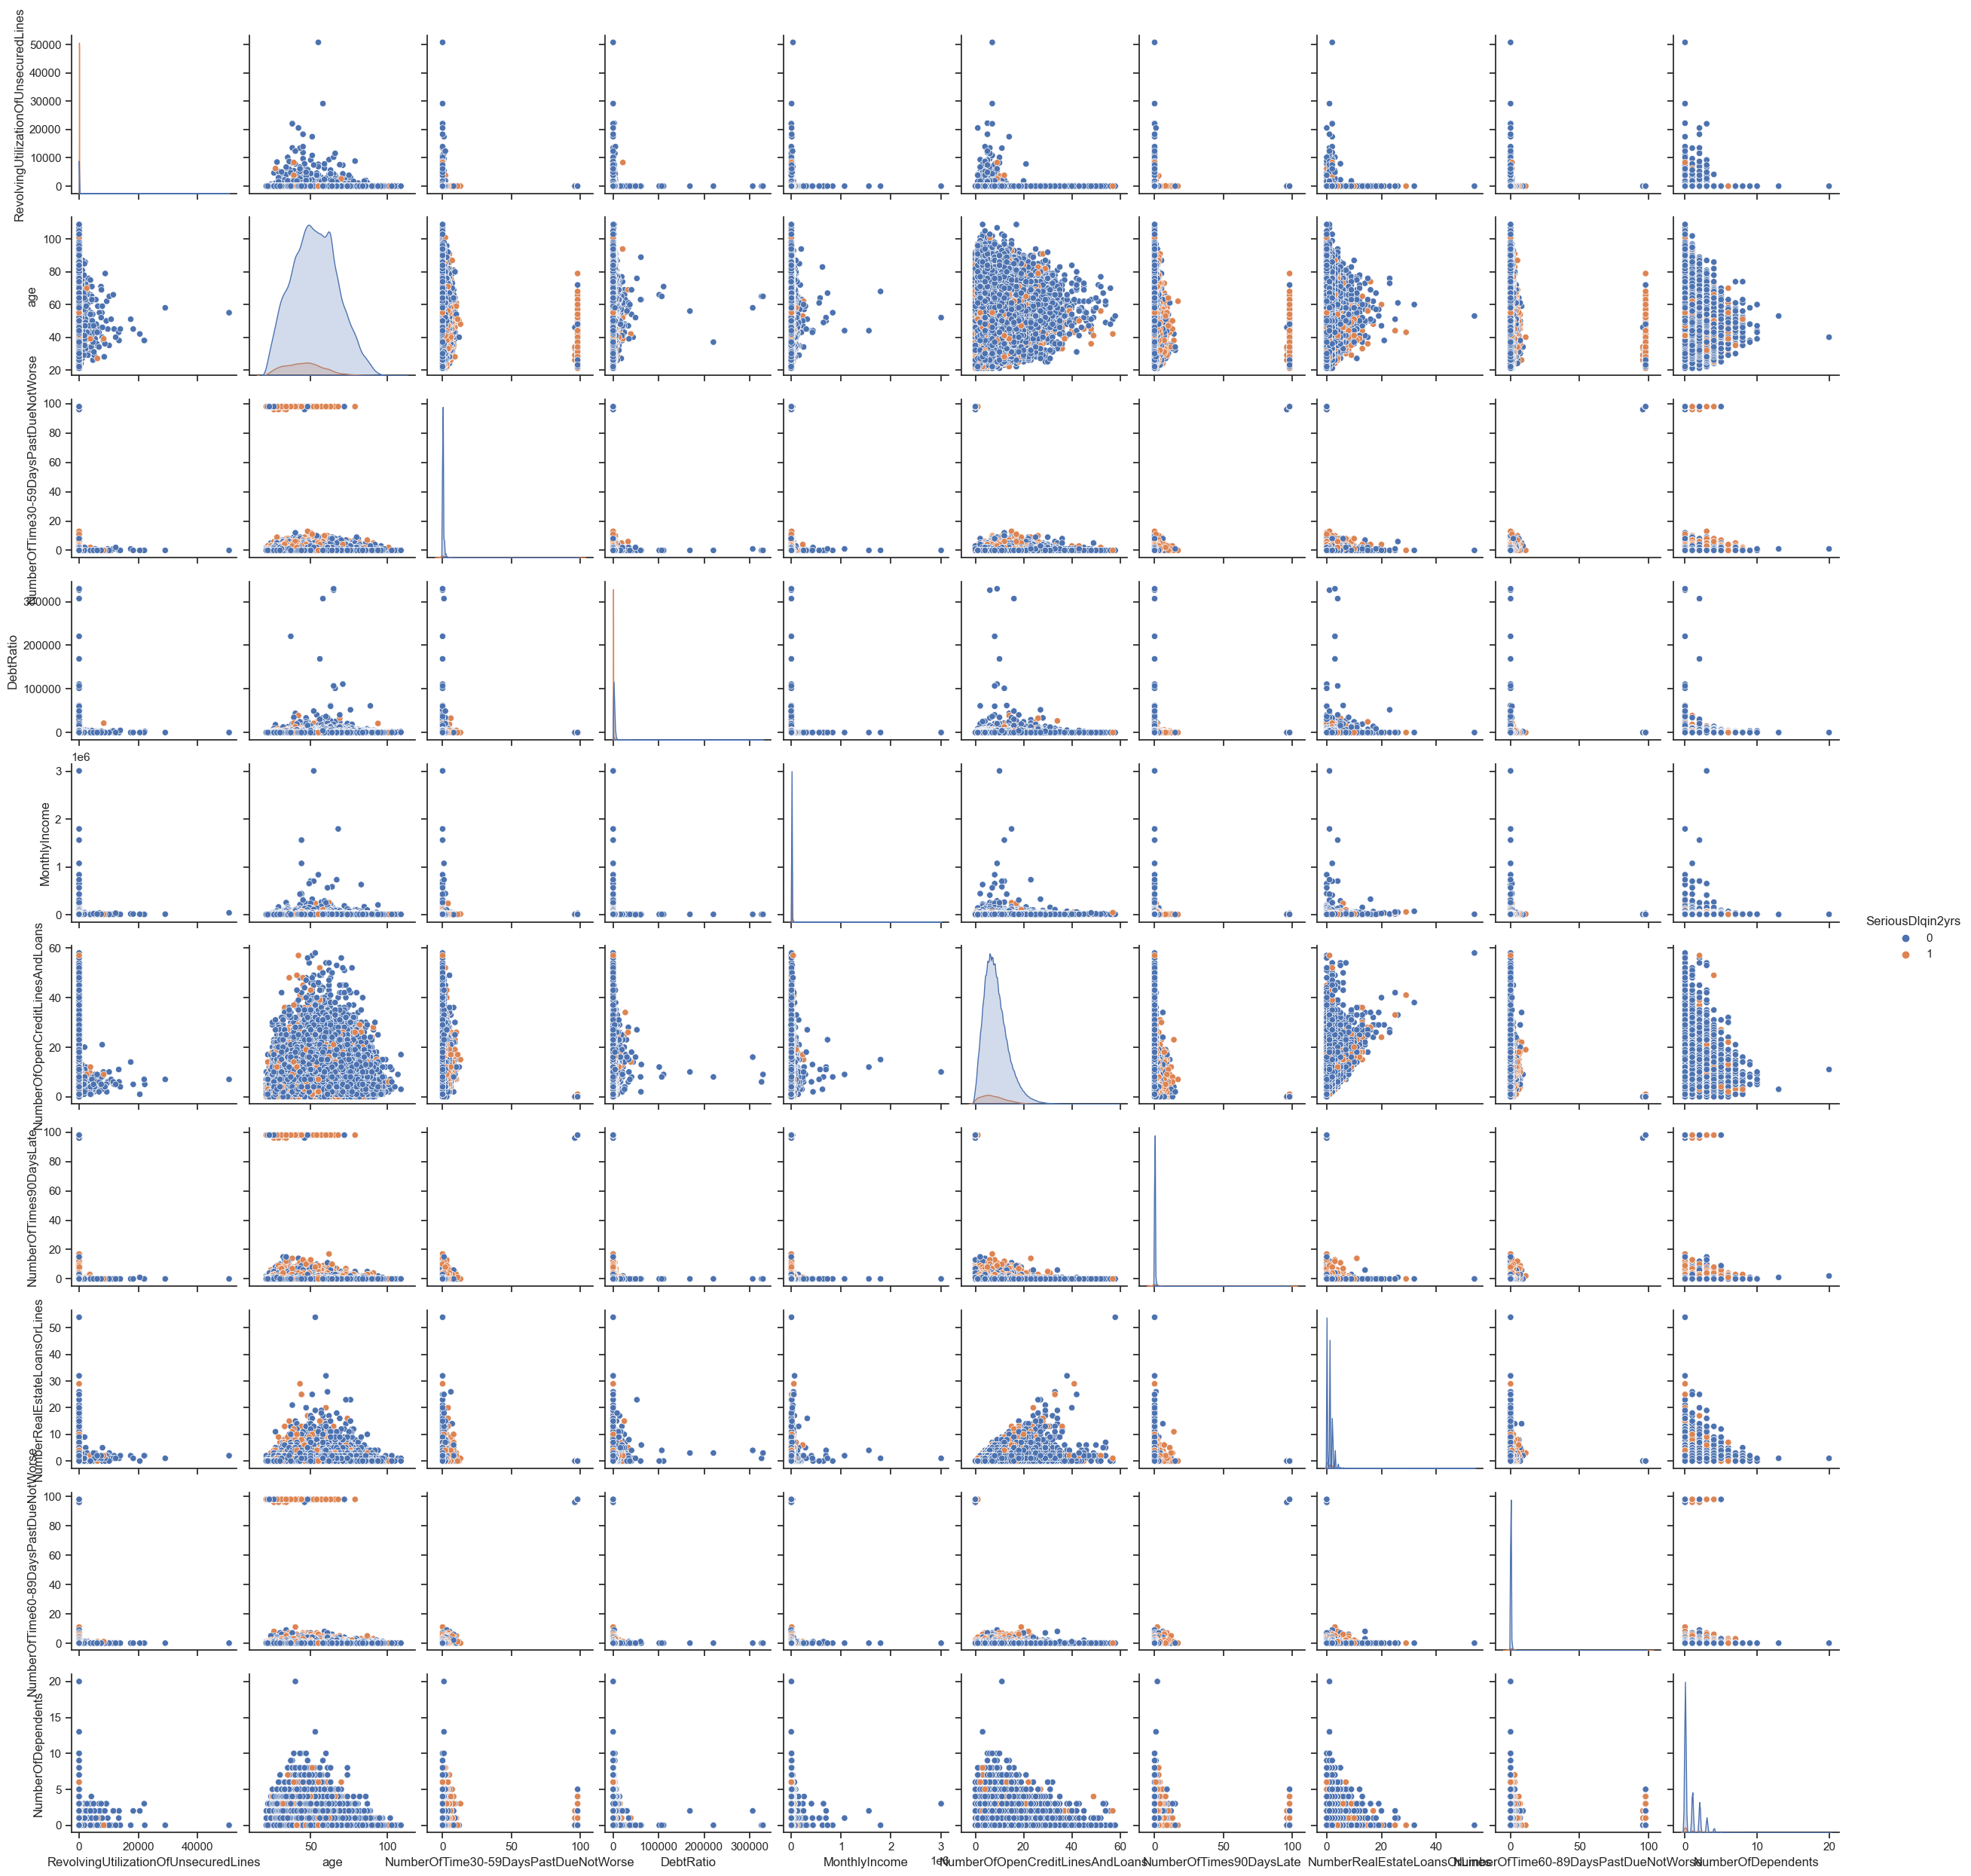

In [47]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df, hue="SeriousDlqin2yrs")

Для столбца NumberOfTime60-89DaysPastDueNotWorse удалим выбивающиеся значения 98 и 96

In [16]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142395
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [17]:
df = df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] != 98]

In [18]:
df = df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] != 96]

Вместо столбцов NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate введем новый столбец в котором будет среднее количество просрочек за период от 30 до бесконечности дней

In [19]:
t=(df['NumberOfTime60-89DaysPastDueNotWorse']+df['NumberOfTime30-59DaysPastDueNotWorse']+df['NumberOfTimes90DaysLate'])/3
df.insert(2,'MeanPastDueNotWorse',t)
df.drop(labels=['NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate'], axis=1, inplace=True)

In [20]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,MeanPastDueNotWorse,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
count,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,1.497300e+05,149730.000000,149730.000000,149730.000000
mean,0.065979,6.057542,0.133690,52.327984,353.631316,6.423097e+03,8.467949,1.020063,0.738142
std,0.248246,249.980364,0.367383,14.754371,2039.601344,1.290112e+04,5.138107,1.129961,1.107373
min,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.029771,0.000000,41.000000,0.175994,3.915000e+03,5.000000,0.000000,0.000000
50%,0.000000,0.153488,0.000000,52.000000,0.367119,5.400000e+03,8.000000,1.000000,0.000000
75%,0.000000,0.555592,0.000000,63.000000,0.870023,7.400000e+03,11.000000,2.000000,1.000000
max,1.000000,50708.000000,6.333333,109.000000,329664.000000,3.008750e+06,58.000000,54.000000,20.000000


In [21]:
corr_matrix = df.corr()

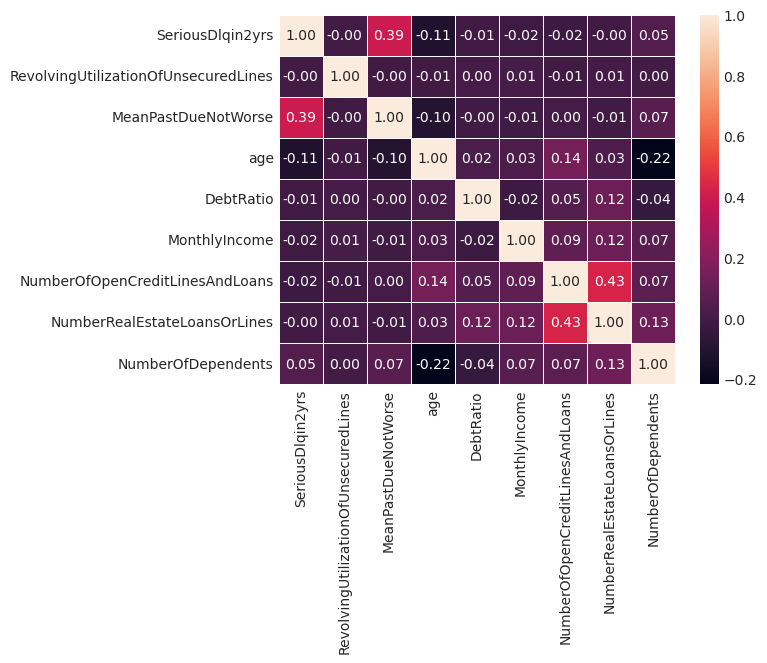

In [22]:
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f");

In [23]:
x=df.copy()
y=df.SeriousDlqin2yrs
x.drop(labels=['SeriousDlqin2yrs'],axis=1, inplace=True)

In [44]:
param_grid_rfc = [
     {'rfc__max_features': [1,2,3,4,5],
      'rfc__max_depth': [3,4,5,6,7]}]

In [45]:
param_grid_log = [
     { 'log__penalty': ['l2', 'l1'],
        'log__solver':['liblinear']}]
    

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=42)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe_rfc = Pipeline([("rfc", RandomForestClassifier())])
pipe_log = Pipeline([("scaler", StandardScaler()), ("log", LogisticRegression())])

RandomForestClassifier

In [48]:
ggrid = GridSearchCV(pipe_rfc, param_grid=param_grid_rfc, cv=5)
ggrid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfc', RandomForestClassifier())]),
             param_grid=[{'rfc__max_depth': [3, 4, 5, 6, 7],
                          'rfc__max_features': [1, 2, 3, 4, 5]}])

In [49]:
print("Лучшие параметры RandomForest:\n{}".format(ggrid.best_estimator_))

Лучшие параметры RandomForest:
Pipeline(steps=[('rfc', RandomForestClassifier(max_depth=7, max_features=4))])


In [58]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
roc_auc_score(y_test, ggrid.predict_proba(X_test)[:, 1])

0.8602618730824227

In [59]:
def calc_auc(y, y_pred, plot_label='', prin=True):
    fpr, tpr, _ = roc_curve(y, y_pred)
    auc_val = auc(fpr, tpr)
    if prin:
        print('ROC AUC: {0:.4f}'.format(auc_val))
    if plot_label:
        plt.plot(fpr, tpr, label=plot_label)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
    return auc_val

ROC AUC: 0.8603


0.8602618730824227

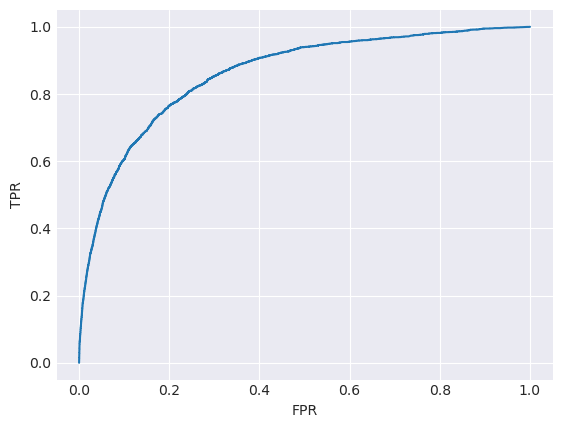

In [60]:
calc_auc(y_test, ggrid.predict_proba(X_test)[:, 1], plot_label='LR')

LogisticRegression

In [61]:
ggrid_log = GridSearchCV(pipe_log, param_grid=param_grid_log, cv=5)
ggrid_log.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log', LogisticRegression())]),
             param_grid=[{'log__penalty': ['l2', 'l1'],
                          'log__solver': ['liblinear']}])

In [62]:
print("Лучшие параметры LogisticRegression:\n{}".format(ggrid_log.best_estimator_))

Лучшие параметры RandomForest:
Pipeline(steps=[('scaler', StandardScaler()),
                ('log', LogisticRegression(solver='liblinear'))])


In [63]:
roc_auc_score(y_test, ggrid_log.predict_proba(X_test)[:, 1])

0.8070327025697758

ROC AUC: 0.8070


0.8070327025697758

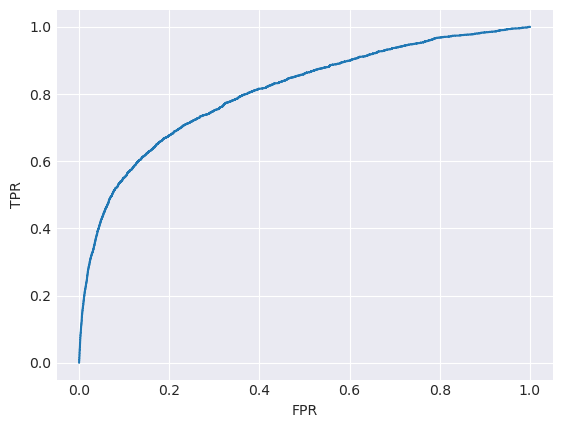

In [64]:
calc_auc(y_test, ggrid_log.predict_proba(X_test)[:, 1], plot_label='LR')

Из полученных данных видим, что на целевую переменную влияет только количество просрочек у заемщика. Наиболее лучшую метрику показала модель  Из полученных данных видим, что на целевую переменную влияет только количество просрочек у заемщика. Наиболее лучшую метрику показала модель RandomForestClassifier. 